In [48]:
from ner.Datasets.OntoNotes5Dataset import OntoNote5Dataset

import matplotlib.pyplot as plt

import pandas as pd 

%reload_ext autoreload
%autoreload 2

In [5]:
dataset = OntoNote5Dataset()

Map:   0%|          | 0/8262 [00:00<?, ? examples/s]

In [33]:
for row in dataset.dataset :
    print("---------------------------------------")
    print(row['text'])
    print(row['spans'])

---------------------------------------
The following were among Friday 's offerings and pricings in the U.S. and non-U.S. capital markets , with terms and syndicate manager , as compiled by Dow Jones Capital Markets Report :
[['Friday', 'DATE'], ['U.S.', 'GPE'], ['non-U.S.', 'GPE'], ['Dow Jones Capital Markets Report', 'ORG']]
---------------------------------------
Dow Chemical Co. --
[['Dow Chemical Co. --', 'ORG']]
---------------------------------------
$ 150 million of 8.55 % senior notes due Oct. 15 , 2009 , priced at par .
[['$ 150 million', 'MONEY'], ['8.55 %', 'PERCENT'], ['Oct. 15 , 2009', 'DATE']]
---------------------------------------
The issue , which is puttable back to the company at par on Oct. 15 , 1999 , was priced at a spread of 50 basis points above the Treasury 's 10 - year note .
[['Oct. 15 , 1999', 'DATE'], ['50', 'CARDINAL'], ['Treasury', 'ORG'], ['10 - year', 'DATE']]
---------------------------------------
Rated single - A - 1 by Moody 's Investors Service I

In [17]:
dataset.dataset = dataset.dataset.map(lambda row : {'nb_tokens' : len(row['tokens']),
                                                    'nb_spans' : len(row['spans'])})

Map:   0%|          | 0/8262 [00:00<?, ? examples/s]

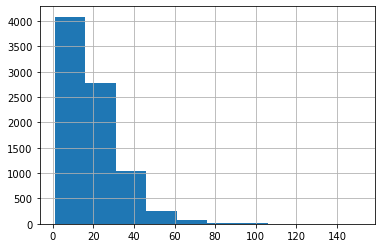

<AxesSubplot:>

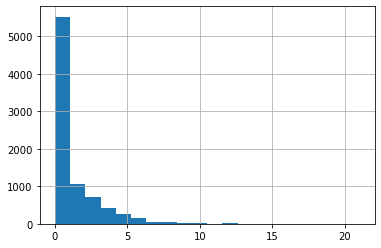

In [38]:
df = pd.DataFrame(dataset.dataset)
# Set the display width option
pd.set_option('display.width', 350)  # Adjust the width as needed
df['nb_tokens'].hist()
plt.show()
df['nb_spans'].hist(bins = 20)

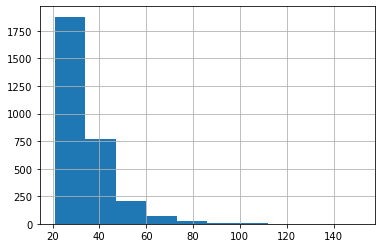

<AxesSubplot:>

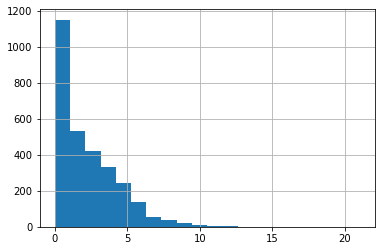

In [28]:
df_long = df[df['nb_tokens'] > 20]
df_long['nb_tokens'].hist()
plt.show()
df_long['nb_spans'].hist(bins = 20)

In [45]:
pd.set_option('display.max_colwidth', None)
df_long[['text', 'spans']]

,text,spans
0,"The following were among Friday 's offerings and pricings in the U.S. and non-U.S. capital markets , with terms and syndicate manager , as compiled by Dow Jones Capital Markets Report :","[[Friday, DATE], [U.S., GPE], [non-U.S., GPE], [Dow Jones Capital Markets Report, ORG]]"
3,"The issue , which is puttable back to the company at par on Oct. 15 , 1999 , was priced at a spread of 50 basis points above the Treasury 's 10 - year note .","[[Oct. 15 , 1999, DATE], [50, CARDINAL], [Treasury, ORG], [10 - year, DATE]]"
4,"Rated single - A - 1 by Moody 's Investors Service Inc. and single - A by Standard & Poor 's Corp. , the non-callable issue will be sold through underwriters led by Merrill Lynch Capital Markets .","[[1, CARDINAL], [Moody 's Investors Service Inc., ORG], [Standard & Poor 's Corp., ORG], [Merrill Lynch Capital Markets, ORG]]"
6,"$ 150 million of 9 % debentures due Oct. 15 , 2019 , priced at 99.943 to yield 9.008 % .","[[$ 150 million, MONEY], [9 %, PERCENT], [Oct. 15 , 2019, DATE], [99.943, CARDINAL], [9.008 %, PERCENT]]"
7,"The non-callable issue , which can be put back to the company in 1999 , was priced at 99 basis points above the Treasury 's 10 - year note .","[[1999, DATE], [99, CARDINAL], [Treasury, ORG], [10 - year, DATE]]"
...,...,...
8172,we 're going to be in need of some sort of accountant do it cause I have no clue how that all works .,[]
8175,"%ah , you know I would n't trust it because it 's so complicated with this international garbage or else the Turbo Tax with the Dutch modules . that I just would n't trust it .","[[the Turbo Tax, PRODUCT], [Dutch, LANGUAGE]]"
8211,"Well , %um actually I think this phone call 's just about to end cause it 's only half an hour ,","[[half an hour, TIME]]"
8215,"or maybe I 'll just call you when we get in Holland just to let you know we 're there ,","[[Holland, GPE]]"


# OntoNotes5
- 18 tags 
- Many long sentences if I preprocess the dataset
- Model Flair on this dataset exist

## Pros 
- More recent 
- More accurate 

## Cons
- More work
- Might be difficult to have exactly the same format in the 18 classes

## Questions 
- In the test set, there are ~ 6000 datapoint out of 8000 that have 0 named entities -> Do I discard many of them and focus on longer sentences ? 

In [46]:
df

,tokens,ner_tags,text,spans,nb_tokens,nb_spans
0,"[The, following, were, among, Friday, 's, offerings, and, pricings, in, the, U.S., and, non-U.S., capital, markets, ,, with, terms, and, syndicate, manager, ,, as, compiled, by, Dow, Jones, Capital, Markets, Report, :]","[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 7, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 12, 12, 12, 12, 0]","The following were among Friday 's offerings and pricings in the U.S. and non-U.S. capital markets , with terms and syndicate manager , as compiled by Dow Jones Capital Markets Report :","[[Friday, DATE], [U.S., GPE], [non-U.S., GPE], [Dow Jones Capital Markets Report, ORG]]",32,4
1,"[Dow, Chemical, Co., --]","[11, 12, 12, 12]",Dow Chemical Co. --,"[[Dow Chemical Co. --, ORG]]",4,1
2,"[$, 150, million, of, 8.55, %, senior, notes, due, Oct., 15, ,, 2009, ,, priced, at, par, .]","[16, 17, 17, 0, 13, 14, 0, 0, 0, 2, 3, 3, 3, 0, 0, 0, 0, 0]","$ 150 million of 8.55 % senior notes due Oct. 15 , 2009 , priced at par .","[[$ 150 million, MONEY], [8.55 %, PERCENT], [Oct. 15 , 2009, DATE]]",18,3
3,"[The, issue, ,, which, is, puttable, back, to, the, company, at, par, on, Oct., 15, ,, 1999, ,, was, priced, at, a, spread, of, 50, basis, points, above, the, Treasury, 's, 10, -, year, note, .]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 11, 0, 2, 3, 3, 0, 0]","The issue , which is puttable back to the company at par on Oct. 15 , 1999 , was priced at a spread of 50 basis points above the Treasury 's 10 - year note .","[[Oct. 15 , 1999, DATE], [50, CARDINAL], [Treasury, ORG], [10 - year, DATE]]",36,4
4,"[Rated, single, -, A, -, 1, by, Moody, 's, Investors, Service, Inc., and, single, -, A, by, Standard, &, Poor, 's, Corp., ,, the, non-callable, issue, will, be, sold, through, underwriters, led, by, Merrill, Lynch, Capital, Markets, .]","[0, 0, 0, 0, 0, 1, 0, 11, 12, 12, 12, 12, 0, 0, 0, 0, 0, 11, 12, 12, 12, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 12, 12, 12, 0]","Rated single - A - 1 by Moody 's Investors Service Inc. and single - A by Standard & Poor 's Corp. , the non-callable issue will be sold through underwriters led by Merrill Lynch Capital Markets .","[[1, CARDINAL], [Moody 's Investors Service Inc., ORG], [Standard & Poor 's Corp., ORG], [Merrill Lynch Capital Markets, ORG]]",38,4
...,...,...,...,...,...,...
8257,[okay],[0],okay,[],1,0
8258,"[and, once, you, 're, in, Holland, the, line, will, be, really, clear, .]","[0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0]",and once you 're in Holland the line will be really clear .,"[[Holland, GPE]]",13,1
8259,"[I, mean, the, phones, here, are, pretty, good, ., once, you, 're, in, the, country, .]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",I mean the phones here are pretty good . once you 're in the country .,[],16,0
8260,"[It, 's, just, these, to, America]","[0, 0, 0, 0, 0, 7]",It 's just these to America,"[[America, GPE]]",6,1
